In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pathlib
data_directory = pathlib.Path('dataset/asl_alphabet_train');
len(list(data_directory.glob('*/*.jpg')))

87000

In [3]:
import os
folder_names = [name for name in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, name))]


In [4]:
folder_names = sorted(folder_names, key=lambda x: (x[0].islower(), x))
folder_names[:2], folder_names[26:]

(['A', 'B'], ['del', 'nothing', 'space'])

In [5]:
alphabet_images_dict = {
    folder: list(data_directory.glob(f"{folder}/*"))
    for folder in os.listdir(data_directory)
    if(data_directory / folder).is_dir()
}
len(alphabet_images_dict['A']), len(alphabet_images_dict['del'])

(3000, 3000)

In [6]:
alphabet_labels_dict = {
    folder: index for index, folder in enumerate(folder_names)
}
alphabet_labels_dict['A'], alphabet_labels_dict['B'], alphabet_labels_dict['nothing']

(0, 1, 27)

In [7]:
img = cv2.imread(str(alphabet_images_dict['A'][0]))
img.shape

(200, 200, 3)

In [8]:
X = np.zeros((87000, 64, 64, 3), dtype=np.float32)
y = np.zeros(87000, dtype=int)

idx = 0
for alphabet, images in alphabet_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(64, 64))
        X[idx] = resized_img
        y[idx] = alphabet_labels_dict[alphabet]
        idx += 1

In [9]:
X_scaled = X / 255

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=0)

In [12]:
num_classes = 29

# Model Definition
model = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(num_classes)
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False
)

# Train the Model
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  
    epochs=31,
    steps_per_epoch=len(X_train) // 32  # Ensures one full pass over the dataset per epoch
)


Epoch 1/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 262s 112ms/step - accuracy: 0.3847 - loss: 2.0645
Epoch 2/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step - accuracy: 0.8438 - loss: 0.4056    
Epoch 3/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 260s 113ms/step - accuracy: 0.8869 - loss: 0.3432
Epoch 4/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.8438 - loss: 0.4933    
Epoch 5/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 260s 112ms/step - accuracy: 0.9321 - loss: 0.2014
Epoch 6/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.9375 - loss: 0.1212    
Epoch 7/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 263s 114ms/step - accuracy: 0.9496 - loss: 0.1511
Epoch 8/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 1.0000 - loss: 0.0792    
Epoch 9/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 260s 113ms/step - accuracy: 0.9588 - loss: 0.1224
Epoch 10/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 0.9688 - loss: 0.0843    
Epoch 11/31
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 260s 113ms/step - accuracy: 0.9643 -

In [27]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  
    epochs=7,
    steps_per_epoch=len(X_train) // 32  # Ensures one full pass over the dataset per epoch
)

Epoch 1/7
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 269s 117ms/step - accuracy: 0.9829 - loss: 0.0530
Epoch 2/7
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 1.0000 - loss: 0.0014    
Epoch 3/7
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 261s 113ms/step - accuracy: 0.9826 - loss: 0.0546
Epoch 4/7
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 1.0000 - loss: 0.0016    
Epoch 5/7
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 263s 114ms/step - accuracy: 0.9831 - loss: 0.0511
Epoch 6/7
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step - accuracy: 1.0000 - loss: 0.0231    
Epoch 7/7
2310/2310 ━━━━━━━━━━━━━━━━━━━━ 261s 113ms/step - accuracy: 0.9839 - loss: 0.0501


In [41]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),  
    epochs=1,
    steps_per_epoch=len(X_train) // 32  # Ensures one full pass over the dataset per epoch
)

2310/2310 ━━━━━━━━━━━━━━━━━━━━ 261s 113ms/step - accuracy: 0.9833 - loss: 0.0499


In [42]:
model.evaluate(X_test, y_test)

408/408 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9927 - loss: 0.0188


[0.018852997571229935, 0.9927203059196472]

In [43]:
X_test.shape, X_train.shape

((13050, 64, 64, 3), (73950, 64, 64, 3))

In [44]:
predictions = model.predict(X_test)

408/408 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


408/408 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


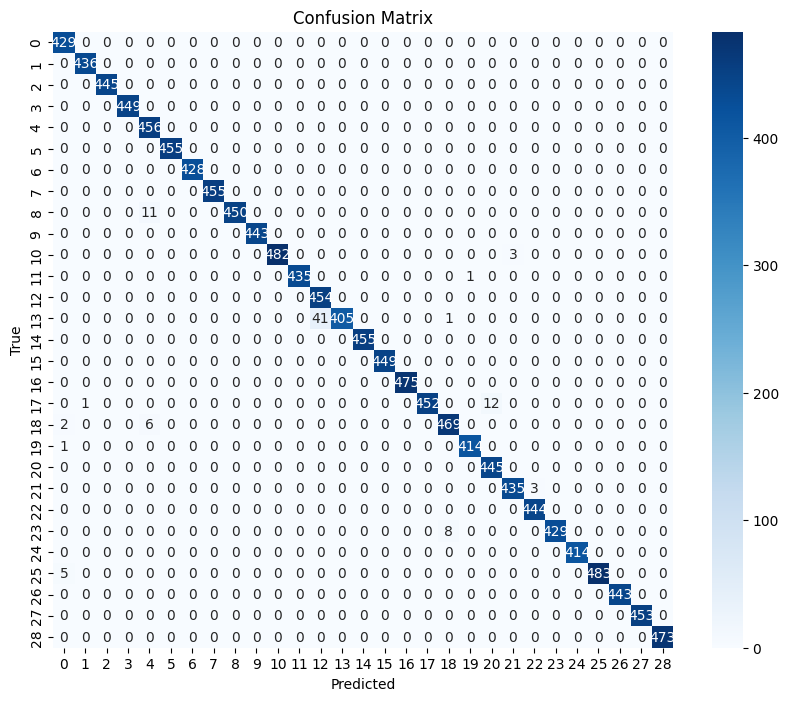

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       429\n           1       1.00      1.00      1.00       436\n           2       1.00      1.00      1.00       445\n           3       1.00      1.00      1.00       449\n           4       0.96      1.00      0.98       456\n           5       1.00      1.00      1.00       455\n           6       1.00      1.00      1.00       428\n           7       1.00      1.00      1.00       455\n           8       1.00      0.98      0.99       461\n           9       1.00      1.00      1.00       443\n          10       1.00      0.99      1.00       485\n          11       1.00      1.00      1.00       436\n          12       0.92      1.00      0.96       454\n          13       1.00      0.91      0.95       447\n          14       1.00      1.00      1.00       455\n          15       1.00      1.00      1.00       449\n          16       1.00      1.00      1.00       475\n       

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

classification_report(y_test, y_pred)


In [46]:
y_pred = np.argmax(model.predict(X_test), axis=1)


408/408 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step


In [47]:
y_pred[:15], y_test[:15]

(array([22,  4, 14, 10, 13,  2, 11, 26, 26, 10,  6,  7, 20, 20, 25],
       dtype=int64),
 array([22,  4, 14, 10, 13,  2, 11, 26, 26, 10,  6,  7, 20, 20, 25]))

In [48]:
test_directory = pathlib.Path('dataset/asl_alphabet_test');
len(list(test_directory.glob('*/*.jpg')))

29

In [49]:
jpg_files = [str(file) for file in test_directory.glob('*/*.jpg')]
jpg_files

['dataset\\asl_alphabet_test\\test\\A_test.jpg',
 'dataset\\asl_alphabet_test\\test\\B_test.jpg',
 'dataset\\asl_alphabet_test\\test\\C_test.jpg',
 'dataset\\asl_alphabet_test\\test\\del_test.jpg',
 'dataset\\asl_alphabet_test\\test\\D_test.jpg',
 'dataset\\asl_alphabet_test\\test\\E_test.jpg',
 'dataset\\asl_alphabet_test\\test\\F_test.jpg',
 'dataset\\asl_alphabet_test\\test\\G_test.jpg',
 'dataset\\asl_alphabet_test\\test\\H_test.jpg',
 'dataset\\asl_alphabet_test\\test\\I_test.jpg',
 'dataset\\asl_alphabet_test\\test\\J_test.jpg',
 'dataset\\asl_alphabet_test\\test\\K_test.jpg',
 'dataset\\asl_alphabet_test\\test\\L_test.jpg',
 'dataset\\asl_alphabet_test\\test\\M_test.jpg',
 'dataset\\asl_alphabet_test\\test\\nothing_test.jpg',
 'dataset\\asl_alphabet_test\\test\\N_test.jpg',
 'dataset\\asl_alphabet_test\\test\\O_test.jpg',
 'dataset\\asl_alphabet_test\\test\\P_test.jpg',
 'dataset\\asl_alphabet_test\\test\\Q_test.jpg',
 'dataset\\asl_alphabet_test\\test\\R_test.jpg',
 'dataset\\a

In [50]:
predictions_dict = {}
for i in jpg_files:
    img = cv2.imread(i)
    resized_img = cv2.resize(img,(64,64))
    scaled_img = resized_img.astype(np.float32) / 255.0
    scaled_img = np.expand_dims(scaled_img, axis=0)
    pred = np.argmax(model.predict(scaled_img))
    predictions_dict[i] = pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [51]:
predictions_dict

{'dataset\\asl_alphabet_test\\test\\A_test.jpg': 0,
 'dataset\\asl_alphabet_test\\test\\B_test.jpg': 1,
 'dataset\\asl_alphabet_test\\test\\C_test.jpg': 2,
 'dataset\\asl_alphabet_test\\test\\del_test.jpg': 26,
 'dataset\\asl_alphabet_test\\test\\D_test.jpg': 3,
 'dataset\\asl_alphabet_test\\test\\E_test.jpg': 4,
 'dataset\\asl_alphabet_test\\test\\F_test.jpg': 5,
 'dataset\\asl_alphabet_test\\test\\G_test.jpg': 6,
 'dataset\\asl_alphabet_test\\test\\H_test.jpg': 7,
 'dataset\\asl_alphabet_test\\test\\I_test.jpg': 8,
 'dataset\\asl_alphabet_test\\test\\J_test.jpg': 9,
 'dataset\\asl_alphabet_test\\test\\K_test.jpg': 10,
 'dataset\\asl_alphabet_test\\test\\L_test.jpg': 11,
 'dataset\\asl_alphabet_test\\test\\M_test.jpg': 12,
 'dataset\\asl_alphabet_test\\test\\nothing_test.jpg': 27,
 'dataset\\asl_alphabet_test\\test\\N_test.jpg': 13,
 'dataset\\asl_alphabet_test\\test\\O_test.jpg': 14,
 'dataset\\asl_alphabet_test\\test\\P_test.jpg': 15,
 'dataset\\asl_alphabet_test\\test\\Q_test.jpg':

In [52]:
for key, value in predictions_dict.items():
    for alpha, label in alphabet_labels_dict.items():
        if value == label:
            predictions_dict[key] = alpha

In [53]:
predictions_dict

{'dataset\\asl_alphabet_test\\test\\A_test.jpg': 'A',
 'dataset\\asl_alphabet_test\\test\\B_test.jpg': 'B',
 'dataset\\asl_alphabet_test\\test\\C_test.jpg': 'C',
 'dataset\\asl_alphabet_test\\test\\del_test.jpg': 'del',
 'dataset\\asl_alphabet_test\\test\\D_test.jpg': 'D',
 'dataset\\asl_alphabet_test\\test\\E_test.jpg': 'E',
 'dataset\\asl_alphabet_test\\test\\F_test.jpg': 'F',
 'dataset\\asl_alphabet_test\\test\\G_test.jpg': 'G',
 'dataset\\asl_alphabet_test\\test\\H_test.jpg': 'H',
 'dataset\\asl_alphabet_test\\test\\I_test.jpg': 'I',
 'dataset\\asl_alphabet_test\\test\\J_test.jpg': 'J',
 'dataset\\asl_alphabet_test\\test\\K_test.jpg': 'K',
 'dataset\\asl_alphabet_test\\test\\L_test.jpg': 'L',
 'dataset\\asl_alphabet_test\\test\\M_test.jpg': 'M',
 'dataset\\asl_alphabet_test\\test\\nothing_test.jpg': 'nothing',
 'dataset\\asl_alphabet_test\\test\\N_test.jpg': 'N',
 'dataset\\asl_alphabet_test\\test\\O_test.jpg': 'O',
 'dataset\\asl_alphabet_test\\test\\P_test.jpg': 'P',
 'dataset\\a

In [54]:
model.save('SignLanguageRecognition.keras')